In [1]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
df_mouse = pd.read_csv(mouse_drug_data_to_load)
df_clinical = pd.read_csv(clinical_trial_data_to_load)

# Combine the data into a single dataset
df_comb = pd.merge(df_mouse, df_clinical, how='left', on='Mouse ID')

# Display the data table for preview
df_comb


,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,f234,Stelasyn,0,45.000000,0
1,f234,Stelasyn,5,47.313491,0
2,f234,Stelasyn,10,47.904324,0
3,f234,Stelasyn,15,48.735197,1
4,f234,Stelasyn,20,51.112713,2
...,...,...,...,...,...
1901,j235,Placebo,0,45.000000,0
1902,j235,Placebo,5,46.588820,0
1903,j235,Placebo,10,48.018788,1
1904,j235,Placebo,15,51.161138,1


In [2]:
df_mouse

,Mouse ID,Drug
0,f234,Stelasyn
1,x402,Stelasyn
2,a492,Stelasyn
3,w540,Stelasyn
4,v764,Stelasyn
...,...,...
245,i669,Placebo
246,r850,Placebo
247,a262,Placebo
248,q787,Placebo


In [3]:
df_clinical

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.000000,0
1,f932,0,45.000000,0
2,g107,0,45.000000,0
3,a457,0,45.000000,0
4,c819,0,45.000000,0
...,...,...,...,...
1888,r944,45,41.581521,2
1889,u364,45,31.023923,3
1890,p438,45,61.433892,1
1891,x773,45,58.634971,4


## Tumor Response to Treatment

In [4]:
df_comb['Drug'].value_counts()

Capomulin    230
Ramicane     228
Stelasyn     194
Ketapril     188
Naftisol     186
Zoniferol    182
Placebo      181
Infubinol    178
Ceftamin     178
Propriva     161
Name: Drug, dtype: int64

In [5]:
df_mouse.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 2 columns):
Mouse ID    250 non-null object
Drug        250 non-null object
dtypes: object(2)
memory usage: 4.0+ KB


In [6]:
len(df_clinical['Mouse ID'].unique())

249

In [7]:
len(df_clinical['Mouse ID'].unique())

249

In [8]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
mean_tumor = df_comb.groupby(['Drug', 'Timepoint']).mean()['Tumor Volume (mm3)']
# Convert to DataFrame
df_mean_tumor = pd.DataFrame(mean_tumor)
df_mean_tumor2 = df_mean_tumor.reset_index()
# Preview DataFrame
df_mean_tumor2

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325
...,...,...,...
95,Zoniferol,25,55.432935
96,Zoniferol,30,57.713531
97,Zoniferol,35,60.089372
98,Zoniferol,40,62.916692


In [9]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
standard_error_tumor = df_comb.groupby(['Drug', 'Timepoint']).sem()['Tumor Volume (mm3)']
# Convert to DataFrame
df_standard_error_tumor = pd.DataFrame(standard_error_tumor).reset_index()
# Preview DataFrame
df_standard_error_tumor


,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731
...,...,...,...
95,Zoniferol,25,0.602513
96,Zoniferol,30,0.800043
97,Zoniferol,35,0.881426
98,Zoniferol,40,0.998515


In [10]:
df_standard_error_tumor2 = df_standard_error_tumor.groupby(['Timepoint', 'Drug']).mean()
df_standard_error_tumor2 = pd.DataFrame(df_standard_error_tumor2)
df_standard_error_tumor2
df_standard_error_tumor3 = df_standard_error_tumor2.reset_index().groupby(['Timepoint', 'Drug'])['Tumor Volume (mm3)'].aggregate('first').unstack()
df_standard_error_tumor3

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.448593,0.164505,0.235102,0.264819,0.202385,0.218091,0.231708,0.482955,0.239862,0.188950
10,0.702684,0.236144,0.282346,0.357421,0.319415,0.402064,0.376195,0.720225,0.433678,0.263949
15,0.838617,0.332053,0.357705,0.580268,0.444378,0.614461,0.466109,0.770432,0.493261,0.370544
20,0.909731,0.359482,0.476210,0.726484,0.595260,0.839609,0.555181,0.786199,0.621889,0.533182
25,0.881642,0.439356,0.550315,0.755413,0.813706,1.034872,0.577401,0.746991,0.741922,0.602513
30,0.934460,0.490620,0.631061,0.934121,0.975496,1.218231,0.746045,0.864906,0.899548,0.800043
35,1.052241,0.692248,0.984155,1.127867,1.013769,1.287481,1.084929,0.967433,1.003186,0.881426
40,1.223608,0.708505,1.055220,1.158449,1.118567,1.370634,1.564779,1.128445,1.410435,0.998515


In [11]:
# Minor Data Munging to Re-Format the Data Frames
df_mean_tumor3 = df_mean_tumor2.groupby(['Timepoint', 'Drug']).mean()
# Preview that Reformatting worked
df_mean_tumor3 = pd.DataFrame(df_mean_tumor3)
df_mean_tumor3

Tumor Volume (mm3)
Timepoint Drug                         
0         Capomulin           45.000000
          Ceftamin            45.000000
          Infubinol           45.000000
          Ketapril            45.000000
          Naftisol            45.000000
...                                 ...
45        Placebo             68.084082
          Propriva            66.258529
          Ramicane            34.955595
          Stelasyn            68.438310
          Zoniferol           65.960888

[100 rows x 1 columns]

In [12]:
df_mean_tumor4 = df_mean_tumor3.reset_index().groupby(['Timepoint', 'Drug'])['Tumor Volume (mm3)'].aggregate('first').unstack()

In [13]:
df_mean_tumor4

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334
25,39.939528,54.287674,55.715252,57.678982,56.731968,57.482574,55.504138,38.974300,56.166123,55.432935
30,38.769339,56.769517,58.299397,60.994507,59.559509,59.809063,58.196374,38.703137,59.826738,57.713531
35,37.816839,58.827548,60.742461,63.371686,62.685087,62.420615,60.350199,37.451996,62.440699,60.089372
40,36.958001,61.467895,63.162824,66.068580,65.600754,65.052675,63.045537,36.574081,65.356386,62.916692


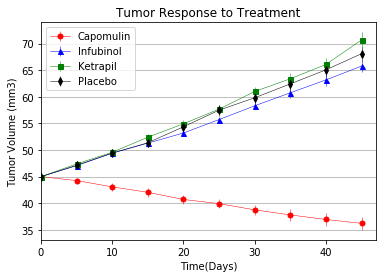

In [14]:
# Generate the Plot (with Error Bars)
plt.hlines(np.arange(35, 75, 5) , -1, 47, alpha=0.25, linewidth=1)
plt.errorbar(df_mean_tumor4.index, df_mean_tumor4['Capomulin'], yerr=df_standard_error_tumor3['Capomulin'], marker='o', c='r',linewidth=0.5, markersize=5)
plt.errorbar(df_mean_tumor4.index, df_mean_tumor4['Infubinol'], yerr=df_standard_error_tumor3['Infubinol'], marker='^', c='b',linewidth=0.5, markersize=5)
plt.errorbar(df_mean_tumor4.index, df_mean_tumor4['Ketapril'], yerr=df_standard_error_tumor3['Ketapril'], marker='s', c='g',linewidth=0.5, markersize=5)
plt.errorbar(df_mean_tumor4.index, df_mean_tumor4['Placebo'], yerr=df_standard_error_tumor3['Placebo'], marker='d', c='k',linewidth=0.5, markersize=5)
plt.xlabel("Time(Days)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Tumor Response to Treatment")
plt.legend(['_HLines','Capomulin', 'Infubinol', 'Ketrapil', 'Placebo'])
plt.xlim(0, 47)



# Save the Figure
plt.savefig("../Images/tumorresponsetotreatment.png")


In [15]:
# Show the Figure
plt.show()

In [16]:
# Show the Figure
plt.show()

![Tumor Response to Treatment](../Images/treatment.png)

## Metastatic Response to Treatment

In [17]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
met_site = df_comb.groupby(['Drug', 'Timepoint']).mean()['Metastatic Sites']
# Convert to DataFrame
df_met_site = pd.DataFrame(met_site).reset_index()
# Preview DataFrame
df_met_site

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.160000
2,Capomulin,10,0.320000
3,Capomulin,15,0.375000
4,Capomulin,20,0.652174
...,...,...,...
95,Zoniferol,25,1.687500
96,Zoniferol,30,1.933333
97,Zoniferol,35,2.285714
98,Zoniferol,40,2.785714


In [18]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
met_site_se = df_comb.groupby(['Drug', 'Timepoint']).sem()['Metastatic Sites']
# Convert to DataFrame
df_met_site_se = pd.DataFrame(met_site_se).reset_index()
# Preview DataFrame
df_met_site_se

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.074833
2,Capomulin,10,0.125433
3,Capomulin,15,0.132048
4,Capomulin,20,0.161621
...,...,...,...
95,Zoniferol,25,0.236621
96,Zoniferol,30,0.248168
97,Zoniferol,35,0.285714
98,Zoniferol,40,0.299791


In [19]:
# Minor Data Munging to Re-Format the Data Frames
df_met_site2 = df_met_site.groupby(['Timepoint', 'Drug']).mean()
df_met_site2 = pd.DataFrame(df_met_site2).reset_index()
df_met_site3 = df_met_site2.groupby(['Timepoint', 'Drug'])['Metastatic Sites'].aggregate('first').unstack()

# Preview that Reformatting worked
df_met_site3

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118
25,0.818182,1.500000,1.277778,1.631579,1.500000,1.941176,1.357143,0.652174,1.157895,1.687500
30,1.090909,1.937500,1.588235,2.055556,2.066667,2.266667,1.615385,0.782609,1.388889,1.933333
35,1.181818,2.071429,1.666667,2.294118,2.266667,2.642857,2.300000,0.952381,1.562500,2.285714
40,1.380952,2.357143,2.100000,2.733333,2.466667,3.166667,2.777778,1.100000,1.583333,2.785714


In [20]:
df_met_site_se2 = df_met_site_se.groupby(['Timepoint', 'Drug']).mean()
df_met_site_se2 = pd.DataFrame(df_met_site_se2).reset_index()
df_met_site_se2
df_met_site_se3 = df_met_site_se2.groupby(['Timepoint', 'Drug'])['Metastatic Sites'].aggregate('first').unstack()
df_met_site_se3

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.074833,0.108588,0.091652,0.098100,0.093618,0.100947,0.095219,0.066332,0.087178,0.077709
10,0.125433,0.152177,0.159364,0.142018,0.163577,0.115261,0.105690,0.090289,0.123672,0.109109
15,0.132048,0.180625,0.194015,0.191381,0.158651,0.190221,0.136377,0.115261,0.153439,0.111677
20,0.161621,0.241034,0.234801,0.236680,0.181731,0.234064,0.171499,0.119430,0.200905,0.166378
25,0.181818,0.258831,0.265753,0.288275,0.185240,0.263888,0.199095,0.119430,0.219824,0.236621
30,0.172944,0.249479,0.227823,0.347467,0.266667,0.300264,0.266469,0.139968,0.230641,0.248168
35,0.169496,0.266526,0.224733,0.361418,0.330464,0.341412,0.366667,0.145997,0.240983,0.285714
40,0.175610,0.289128,0.314466,0.315725,0.321702,0.297294,0.433903,0.160591,0.312815,0.299791


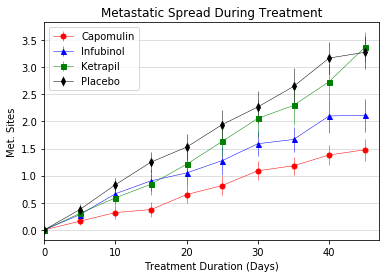

In [21]:
# Generate the Plot (with Error Bars)
plt.hlines(np.arange(0.0, 3.7, 0.5) , -1, 47, alpha=0.25, linewidth=0.5)
plt.errorbar(df_met_site3.index, df_met_site3['Capomulin'], yerr=df_met_site_se3['Capomulin'], marker='o', c='r',linewidth=0.5, markersize=5)
plt.errorbar(df_met_site3.index, df_met_site3['Infubinol'], yerr=df_met_site_se3['Infubinol'], marker='^', c='b',linewidth=0.5, markersize=5)
plt.errorbar(df_met_site3.index, df_met_site3['Ketapril'], yerr=df_met_site_se3['Ketapril'], marker='s', c='g',linewidth=0.5, markersize=5)
plt.errorbar(df_met_site3.index, df_met_site3['Placebo'], yerr=df_met_site_se3['Placebo'], marker='d', c='k',linewidth=0.5, markersize=5)
plt.xlabel("Treatment Duration (Days)")
plt.ylabel("Met. Sites")
plt.title("Metastatic Spread During Treatment")
plt.legend(['_HLines','Capomulin', 'Infubinol', 'Ketrapil', 'Placebo'])
plt.xlim(0, 47)

# Save the Figure
plt.savefig("../Images/metastaticspreadduringtreatment.png")
# Show the Figure
plt.show()

## Survival Rates

In [22]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
survival = df_comb.groupby(['Drug', 'Timepoint']).count()['Mouse ID']
# Convert to DataFrame
df_survival = pd.DataFrame(survival)
# Preview DataFrame
df_survival

Mouse ID
Drug      Timepoint          
Capomulin 0                25
          5                25
          10               25
          15               24
          20               23
...                       ...
Zoniferol 25               16
          30               15
          35               14
          40               14
          45               14

[100 rows x 1 columns]

In [23]:
df_survival2 = df_survival.groupby(['Timepoint', 'Drug']).mean()
df_survival2 = pd.DataFrame(df_survival2)
df_survival3 = df_survival2.groupby(['Timepoint', 'Drug'])['Mouse ID'].aggregate('first').unstack()
df_survival3

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17
25,22,18,18,19,18,17,14,23,19,16
30,22,16,17,18,15,15,13,23,18,15
35,22,14,12,17,15,14,10,21,16,14
40,21,14,10,15,15,12,9,20,12,14


In [24]:
# Minor Data Munging to Re-Format the Data Frames

# Preview the Data Frame


In [25]:
for x in df_survival3:
    df_survival3[x] = round((df_survival3[x]/df_survival3[x][0])*100,0)


In [26]:
df_survival3

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0
5,100.0,84.0,100.0,92.0,92.0,96.0,96.0,100.0,96.0,96.0
10,100.0,80.0,84.0,88.0,84.0,96.0,88.0,96.0,88.0,88.0
15,96.0,76.0,84.0,76.0,84.0,80.0,65.0,96.0,88.0,84.0
20,92.0,72.0,80.0,76.0,80.0,76.0,65.0,92.0,81.0,68.0
25,88.0,72.0,72.0,76.0,72.0,68.0,54.0,92.0,73.0,64.0
30,88.0,64.0,68.0,72.0,60.0,60.0,50.0,92.0,69.0,60.0
35,88.0,56.0,48.0,68.0,60.0,56.0,38.0,84.0,62.0,56.0
40,84.0,56.0,40.0,60.0,60.0,48.0,35.0,80.0,46.0,56.0


In [27]:
def timesThree(x):
    return x*3

In [28]:
timesThree(4)

12

In [29]:
timesThree2 = lambda x: x*3

In [30]:
timesThree2(4)

12

In [31]:
df_survival3.apply(lambda col: col/col[0])*100

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0
5,100.0,84.0,100.0,92.0,92.0,96.0,96.0,100.0,96.0,96.0
10,100.0,80.0,84.0,88.0,84.0,96.0,88.0,96.0,88.0,88.0
15,96.0,76.0,84.0,76.0,84.0,80.0,65.0,96.0,88.0,84.0
20,92.0,72.0,80.0,76.0,80.0,76.0,65.0,92.0,81.0,68.0
25,88.0,72.0,72.0,76.0,72.0,68.0,54.0,92.0,73.0,64.0
30,88.0,64.0,68.0,72.0,60.0,60.0,50.0,92.0,69.0,60.0
35,88.0,56.0,48.0,68.0,60.0,56.0,38.0,84.0,62.0,56.0
40,84.0,56.0,40.0,60.0,60.0,48.0,35.0,80.0,46.0,56.0


In [32]:
df_survival4 = df_survival3


In [33]:
df_survival4['Capomulin'] = df_survival4['Capomulin'].map('{:,.0f}'.format)
df_survival4['Ceftamin'] = df_survival4['Ceftamin'].map('{:,.0f}'.format)
df_survival4['Infubinol'] = df_survival4['Infubinol'].map('{:,.0f}'.format)
df_survival4['Ketapril'] = df_survival4['Ketapril'].map('{:,.0f}'.format)
df_survival4['Naftisol'] = df_survival4['Naftisol'].map('{:,.0f}'.format)
df_survival4['Placebo'] = df_survival4['Placebo'].map('{:,.0f}'.format)
df_survival4['Propriva'] = df_survival4['Propriva'].map('{:,.0f}'.format)
df_survival4['Ramicane'] = df_survival4['Ramicane'].map('{:,.0f}'.format)
df_survival4['Stelasyn'] = df_survival4['Stelasyn'].map('{:,.0f}'.format)
df_survival4['Zoniferol'] = df_survival4['Zoniferol'].map('{:,.0f}'.format)

In [34]:
df_survival4

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,100,100,100,100,100,100,100,100,100,100
5,100,84,100,92,92,96,96,100,96,96
10,100,80,84,88,84,96,88,96,88,88
15,96,76,84,76,84,80,65,96,88,84
20,92,72,80,76,80,76,65,92,81,68
25,88,72,72,76,72,68,54,92,73,64
30,88,64,68,72,60,60,50,92,69,60
35,88,56,48,68,60,56,38,84,62,56
40,84,56,40,60,60,48,35,80,46,56


In [53]:
df_survival4['Capomulin'] = df_survival4['Capomulin'].astype(float)
df_survival4['Ceftamin'] = df_survival4['Ceftamin'].astype(float)
df_survival4['Infubinol'] = df_survival4['Infubinol'].astype(float)
df_survival4['Ketapril'] = df_survival4['Ketapril'].astype(float)
df_survival4['Naftisol'] = df_survival4['Naftisol'].astype(float)
df_survival4['Placebo'] = df_survival4['Placebo'].astype(float)
df_survival4['Propriva'] = df_survival4['Propriva'].astype(float)
df_survival4['Ramicane'] = df_survival4['Ramicane'].astype(float)
df_survival4['Stelasyn'] = df_survival4['Stelasyn'].astype(float)
df_survival4['Zoniferol'] = df_survival4['Zoniferol'].astype(float)

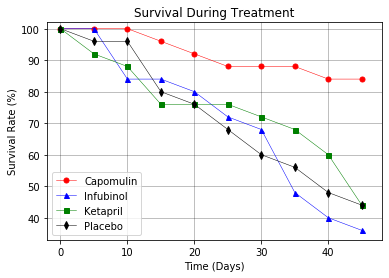

In [87]:
# Generate the Plot (Accounting for percentages)
plt.hlines(np.arange(40, 101, 10) , -2, 48, alpha=0.25, linewidth=1)
plt.vlines(np.arange(0, 50, 10) , 30, 102, alpha=0.25, linewidth=1)
plt.plot(df_survival4['Capomulin'], marker='o', c='r',linewidth=0.5, markersize=5)
plt.plot(df_survival4['Infubinol'], marker='^', c='b',linewidth=0.5, markersize=5)
plt.plot(df_survival4['Ketapril'], marker='s', c='g',linewidth=0.5, markersize=5)
plt.plot(df_survival4['Placebo'], marker='d', c='k',linewidth=0.5, markersize=5)
plt.title('Survival During Treatment')
plt.xlabel('Time (Days)')
plt.ylabel("Survival Rate (%)")
plt.legend(['Capomulin', 'Infubinol', 'Ketapril', 'Placebo'])
plt.xlim(-2, 48)
plt.ylim(33, 102)
# Save the Figure
plt.savefig("../Images/survivalduringtreatment")
# Show the Figure
plt.show()

![Metastatic Spread During Treatment](../Images/survival.png)

## Summary Bar Graph

In [ ]:
# Calculate the percent changes for each drug

# Display the data to confirm


In [88]:
df_mean_tumor5 = df_mean_tumor4

In [92]:
df_mean_tumor5

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334
25,39.939528,54.287674,55.715252,57.678982,56.731968,57.482574,55.504138,38.974300,56.166123,55.432935
30,38.769339,56.769517,58.299397,60.994507,59.559509,59.809063,58.196374,38.703137,59.826738,57.713531
35,37.816839,58.827548,60.742461,63.371686,62.685087,62.420615,60.350199,37.451996,62.440699,60.089372
40,36.958001,61.467895,63.162824,66.068580,65.600754,65.052675,63.045537,36.574081,65.356386,62.916692


In [90]:
for x in df_mean_tumor5[x]:
    df_mean_tumor5[x] = df_mean_tumor5[x][9]/df_
    

SyntaxError: invalid syntax (<ipython-input-90-2f4d004ca5e4>, line 1)

In [ ]:
# Store all Relevant Percent Changes into a Tuple


# Splice the data between passing and failing drugs


# Orient widths. Add labels, tick marks, etc. 


# Use functions to label the percentages of changes


# Call functions to implement the function calls


# Save the Figure


# Show the Figure
fig.show()

![Metastatic Spread During Treatment](../Images/change.png)